In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\LENOVO\Downloads\aqi_data.csv")
df.head()


,state,city,station,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,...,Predominant_Parameter,datetime,year,month,day,weekday,hour,temperature,altitude,humidity
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",68,64,17,4,28,31,40,...,PM2.5,2020-01-03 10:00:00,2020,1,3,Friday,10,26,76,52
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",67,70,23,2,13,49,77,...,OZONE,2020-01-03 10:00:00,2020,1,3,Friday,10,39,115,54
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",32,64,26,5,6,19,16,...,PM2.5,2020-01-03 10:00:00,2020,1,3,Friday,10,34,153,88
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",93,93,31,3,9,57,61,...,PM10,2020-01-03 10:00:00,2020,1,3,Friday,10,30,405,79
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",60,55,20,5,18,29,53,...,PM2.5,2020-01-05 06:00:00,2020,1,5,Sunday,6,27,102,72


In [5]:
df.values

array([['Andhra_Pradesh', 'Amaravati', 'Secretariat, Amaravati - APPCB',
        ..., 26, 76, 52],
       ['Andhra_Pradesh', 'Rajamahendravaram',
        'Anand Kala Kshetram, Rajamahendravaram - APPCB', ..., 39, 115,
        54],
       ['Andhra_Pradesh', 'Tirupati', 'Tirumala, Tirupati - APPCB', ...,
        34, 153, 88],
       ...,
       ['West_Bengal', 'Kolkata', 'Rabindra Sarobar, Kolkata - WBPCB',
        ..., 28, 261, 67],
       ['West_Bengal', 'Kolkata', 'Victoria, Kolkata - WBPCB', ..., 32,
        166, 80],
       ['West_Bengal', 'Siliguri', 'Ward-32 Bapupara, Siliguri - WBPCB',
        ..., 20, 435, 65]], dtype=object)

In [36]:
# Convert datetime to pandas datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# Resample numeric columns by hour
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_resample = df[numeric_cols].resample('h').mean()  # hourly mean for numeric columns

# Merge AQI resampled separately
df_aqi_resample = df[['AQI']].resample('h').mean()
df_resample['AQI'] = df_aqi_resample['AQI']

# Drop any rows with NaN AQI
df_resample = df_resample.dropna(subset=['AQI'])

df_resample.head()


,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,year,month,day,hour,temperature,altitude,humidity
datetime,,,,,,,,,,,,,,,
2020-01-03 10:00:00,190.481865,159.181347,47.497409,9.150259,16.020725,58.632124,31.331606,195.373057,2020.0,1.0,3.0,10.0,29.264249,239.932642,61.202073
2020-01-05 06:00:00,196.312500,156.135417,46.520833,8.708333,15.859375,42.593750,42.645833,202.322917,2020.0,1.0,5.0,6.0,29.239583,247.281250,58.411458
2020-01-06 03:00:00,185.979592,151.168367,46.872449,8.525510,16.270408,52.056122,28.954082,192.433673,2020.0,1.0,6.0,3.0,28.642857,257.163265,59.316327
2020-01-06 06:00:00,188.505102,152.209184,47.530612,8.602041,16.535714,49.857143,33.938776,195.096939,2020.0,1.0,6.0,6.0,29.086735,248.040816,59.704082
2020-01-06 11:00:00,182.543147,146.629442,47.335025,8.517766,16.639594,53.451777,27.741117,189.426396,2020.0,1.0,6.0,11.0,29.827411,220.741117,60.573604


In [37]:
X=df.drop("AQI",axis=1)
Y=df["AQI"]
n=df.shape[0]
n=int (n*0.65)
train_x=X[:n-1]
test_x=X[n-1:-1]
train_y=Y[1:n]
test_y=Y[n:]

#train_x=train_x.astype(int)
#test_x=test_x.astype(int)
train_y=train_y.astype(int)
test_y=test_y.astype(int)

### Logistic Regression

In [38]:
# model=LogisticRegression()
# model.fit(train_x,train_y)
# p=model.predict(test_x)
# acc_log= round(model.score(train_x,train_y) * 100, 2)
# acc_logP= round(model.score(test_x,test_y) * 100, 2)
# p
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Features and target
X = df.drop("AQI", axis=1)
Y = df["AQI"].astype(int)

# Train/test split (65% train)
n = int(len(X) * 0.65)
train_x = X[:n]
test_x = X[n:]
train_y = Y[:n]
test_y = Y[n:]

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline with Logistic Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000))
])

# Fit model
model.fit(train_x, train_y)

# Predict and calculate accuracy
pred_y = model.predict(test_x)
acc_train = round(model.score(train_x, train_y) * 100, 2)
acc_test = round(model.score(test_x, test_y) * 100, 2)

print("Train Accuracy:", acc_train)
print("Test Accuracy:", acc_test)


Train Accuracy: 72.07
Test Accuracy: 1.46


### KNN

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Identify numeric and categorical columns
numeric_cols = train_x.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = train_x.select_dtypes(include=['object']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline with KNN
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

# Fit model
knn_model.fit(train_x, train_y)

# Predict
Y_pred = knn_model.predict(test_x)

# Accuracy
acc_knn_train = round(knn_model.score(train_x, train_y) * 100, 2)
acc_knn_test = round(knn_model.score(test_x, test_y) * 100, 2)

print("Train Accuracy:", acc_knn_train)
print("Test Accuracy:", acc_knn_test)
print("Predictions:", Y_pred)


Train Accuracy: 38.35
Test Accuracy: 0.55
Predictions: [151 154 210 141  86  80  83 144 141 169 104  88  61 134 167 147 296  69
 168 116 168  60 177 151 281 188 296 123  88  70  54  88 195 189  32  84
 141  69  56  46 178 119 137  31  70  50 123  33  99  68  50  50  79  69
 117  34 120  78 126  69  63  69  69  29  69  65  61  44  92  44  69  60
  69  64  49  69  60 119  69  34  69  29  44  54  53  69  69  54  54  53
  33 189  54 261  93 189  76 189  57 123 152 148  67 164  90 153 224 232
 153 117 103  54  76 234  68 151 105 152  35  69  89  66  68 178  76 115
 105 122  54  94 112  61  30 304  76 114 153 149 123 100 156  64  77 178
  62  72  97 141  62  64 153 123  56 178  62 105  63 141  33 107 146 105
  61 145 102  86 121 220  61 155 160  69 152  57  76  91  60 106  46  84
  47  69  47  35  50  41  51  62  50  50  69  46  64  30  69  57  77  31
  64  44  54  55  54  36  70  45  54  54  36  31  70  71  68  71  70  32
  56 103  75 139  56 111  69  54 121 144  69 112  69  71 148  69 112 

### Random Forest

In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Identify numeric and categorical columns
numeric_cols = train_x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_x.select_dtypes(include=['object']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline with Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit model
rf_model.fit(train_x, train_y)

# Predict
Y_prediction = rf_model.predict(test_x)

# Accuracy
acc_rf_train = round(rf_model.score(train_x, train_y) * 100, 2)
acc_rf_test = round(rf_model.score(test_x, test_y) * 100, 2)

print("Train Accuracy:", acc_rf_train)
print("Test Accuracy:", acc_rf_test)
print("Predictions:", Y_prediction)


Train Accuracy: 100.0
Test Accuracy: 2.19
Predictions: [200 201 220 220  86 109  83 198 141 228 104  88  98 155 164 112 261 100
 265 103 265 107 263 112 224 121 306 142 100 152  91 100 216 155 169 137
 100  91 111 105 243 142 105  69  80  94 119  69 169  54 141  69  89 100
 119  34 155  78 100  69  64 100  97  61  91  74  89  63  63 100  69  54
  88  64  80  69  43 109  69  62 104  54 105  69  69 109  69  62 119  50
  78 189  98 265  93 155  91 232 114 214  91 189  82 271 105 189 189 232
  98 117 161  78  76 265  89 139 147 232  93 115 112  78  78 265  89 153
 147 271  78  94 112  89  80 232  89 114  97 261 100 100 106  91  80 178
 112 153 114 151 102 115 176 107  86 172 104 144 103 246 144 141 112 109
  96 178  62 128 121 151 151 146 107 100  61  50  57  50  59  61  32  87
  69  69  50  50  69  41  69  50  50  69  50  68  64  50  69  50  30  43
  50  69  50  55  50  55  69  43  70  55  32  69  61  54 100  76  70  70
 100 105 105 111 100 228 109  89 123  99  95 112 100  89 100  99 112 

### Decision Tree

In [41]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Identify numeric and categorical columns
numeric_cols = train_x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_x.select_dtypes(include=['object']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline with Decision Tree
tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the model
tree_model.fit(train_x, train_y)

# Predict
Y_pred2 = tree_model.predict(test_x)

# Accuracy
acc_decision_tree_train = round(tree_model.score(train_x, train_y) * 100, 2)
acc_decision_tree_test = round(tree_model.score(test_x, test_y) * 100, 2)

print("Train Accuracy:", acc_decision_tree_train)
print("Test Accuracy:", acc_decision_tree_test)
print("Predictions:", Y_pred2)


Train Accuracy: 100.0
Test Accuracy: 30.29
Predictions: [200 201 224 225  86 112  95 198 141 228 103  89  63 144 163 112 248 102
 248 112 265 112 271 114 349 115 418 163  99 151 149  86 271 164 163 144
 101 125  82  90 315 116 147  66  78  99 119  64 170  82  96  66  71  96
 119  69 170  80  98  66  61  96  72  69  82  92  91  60  60  96  95  60
  82  64  93  49  96 114  63  64  82  64  72  62  61 117  63  64  82  43
  95 112  93 317  93 116  98 223 128 163 114 163  91 288 149 179 197 223
 141 124 130  78  86 272 102 147 120 217 104 128 149  84  86 275 104 144
 114 217 102 128 115 122  86 278  98 187 115 198  96 100 115 109  86 271
 100 122 112 173  91 101 114 104  86 197  93 149 122 201 161 144 107 105
  86 198  93 149 122 201 123 148 107  66  95  66  51  69  69  43  69  50
  43  69  34  66  66  41  69  95  57  66  51  69  84  66  66  51  36  84
  50  62  49  51  70  41  51  49  51  70  36  51  58  60  99  58  93  60
  98 112 104 105 117 194 111  93 115 122 104 148 104  92 112 117 143

### 'Support Vector Machines

In [42]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numeric and categorical columns
numeric_cols = train_x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_x.select_dtypes(include=['object']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline
svc_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC(max_iter=5000, random_state=42))
])

# Fit model
svc_model.fit(train_x, train_y)

# Predict
Y_pred3 = svc_model.predict(test_x)

# Accuracy
acc_linear_svc_train = round(svc_model.score(train_x, train_y) * 100, 2)
acc_linear_svc_test = round(svc_model.score(test_x, test_y) * 100, 2)

print("Train Accuracy:", acc_linear_svc_train)
print("Test Accuracy:", acc_linear_svc_test)
print("Predictions:", Y_pred3)


Train Accuracy: 88.89
Test Accuracy: 1.28
Predictions: [151 201 220 220  86 109  55 198 141 228 104  88  76 289 178 110 165 172
 178 147 178 103 178 103 165 107 165 244  91  70  78 142 319  32  32 189
 271 189 189 105 395 194 148  69 214 120 261 144 261  71 125  50  63 123
 123  77  77  68  87  69 113 123  69 114  69  85  74 135 149  44  85  85
  92  85  84  68  54 217 189  62 148  63  54  68  34 141  68  62  32 119
 144 183  78 224  76  77  76 190  57 216 141 189  90 265 161 189 177 153
 189 189 194 121  43 141 112 322 121 315  78  47 106 161 121  48 106 241
 106 153  78 241 147 147  82 359 161  74 121  46 147 100  65  92 305 145
 188 256  92 163  85  49 103 112 102 170  62 144 106 271  33 246 107  62
 151 202 104 102 112 192 102 232 291 271  76  70  85  50  61 103 114 116
  43 106 120  50  69  87  63 121 116 116  69  58 147  69  69  69 114 135
  85  84  50  55  54 122 144  69  69  60  63 144  76  76 142  76 189 241
 189  82  41 120 189 189 116  78 120 144 125 125 168  77 150 144 125 

### RESULT

In [43]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Train_Score': [acc_linear_svc_train, acc_knn_train, acc_train, 
                    acc_rf_train, acc_decision_tree_train],
    'Test_Score': [acc_linear_svc_test, acc_knn_test, acc_test, 
                   acc_rf_test, acc_decision_tree_test]
})

# Sort by Test_Score descending and set Model as index
result_df = results.sort_values(by='Test_Score', ascending=False).set_index('Model')
result_df


,Train_Score,Test_Score
Model,,
Decision Tree,100.00,30.29
Random Forest,100.00,2.19
Logistic Regression,72.07,1.46
Support Vector Machines,88.89,1.28
KNN,38.35,0.55


### Evaluation

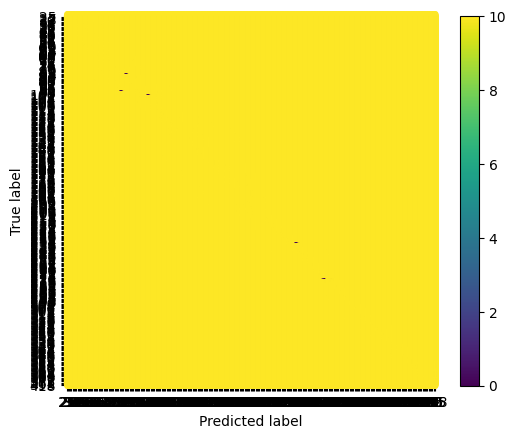

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

# Example for Decision Tree predictions
ConfusionMatrixDisplay.from_predictions(test_y, Y_pred2)  # Y_pred2 = Decision Tree predictions


In [30]:
# Support Vector Machines

#plot_confusion_matrix(linear_svc,test_x,test_y)
print('SVM Confucion Matrix')

SVM Confucion Matrix


In [31]:
# KNN

#plot_confusion_matrix(knn,test_x,test_y)
print('LG Confusion Matrix')

LG Confusion Matrix


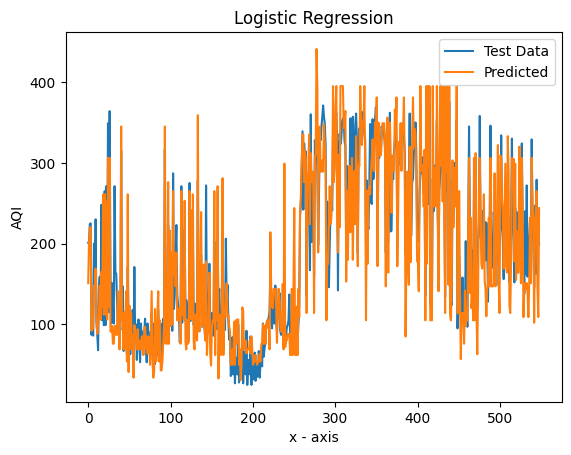

In [45]:
import matplotlib.pyplot as plt

# Logistic Regression
plt.plot(range(len(test_y)), test_y, label="Test Data")
plt.plot(range(len(test_y)), pred_y, label="Predicted")  # use pred_y from pipeline
plt.xlabel('x - axis')
plt.ylabel('AQI')
plt.title('Logistic Regression')
plt.legend()
plt.show()


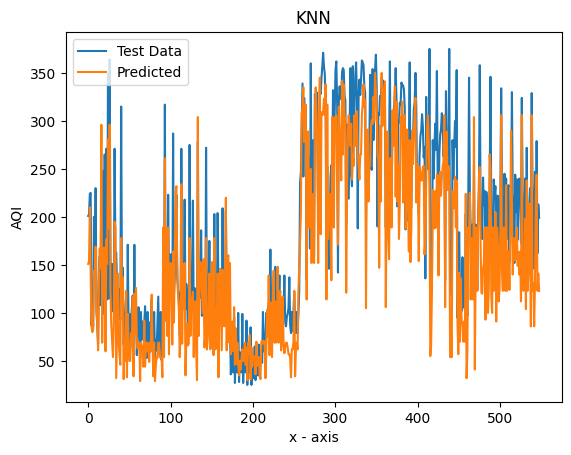

In [46]:
# KNN  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('KNN')
plt.legend()
plt.show() 

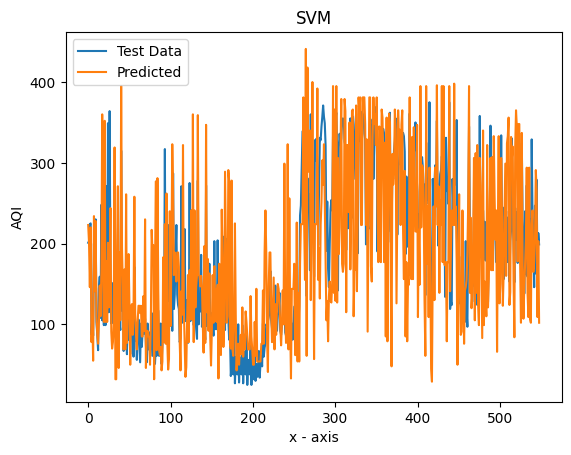

In [27]:
# SVM  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred3,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('SVM')
plt.legend()
plt.show() 

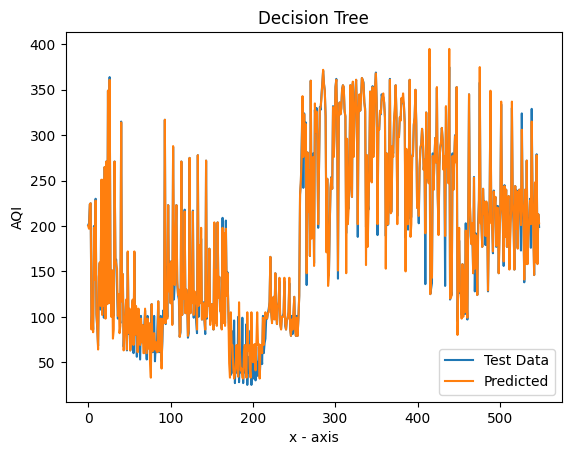

In [28]:
# Dession Tree  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred2,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Decision Tree')
plt.legend()
plt.show() 

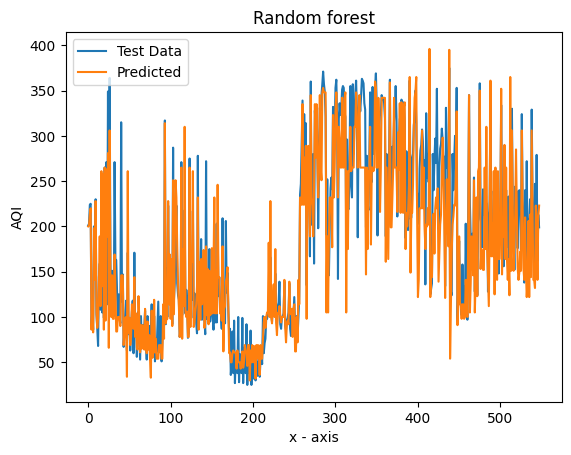

In [29]:
# Random Forest 
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_prediction,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Random forest')
plt.legend()
plt.show() 

In [47]:
import pickle

# Save the Decision Tree pipeline
with open('decision_tree_pipeline.pkl', 'wb') as handle:
    pickle.dump(tree_model, handle, pickle.HIGHEST_PROTOCOL)


In [48]:
# de-serialize mlp_nn.pkl file into an object called mlp_nn using pickle
with open('decisionTree.pkl', 'rb') as handle:
    aqiModel = pickle.load(handle) 

In [49]:
test_x

,state,city,station,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,Predominant_Parameter,year,month,day,weekday,hour,temperature,altitude,humidity
datetime,,,,,,,,,,,,,,,,,,,
2020-01-07 03:00:00,Maharashtra,Mumbai,"Sion, Mumbai - MPCB",187,201,113,12,8,45,39,PM10,2020,1,7,Tuesday,3,39,490,39
2020-01-07 03:00:00,Maharashtra,Mumbai,"Vasai West, Mumbai - MPCB",203,148,24,4,10,87,44,PM2.5,2020,1,7,Tuesday,3,28,441,76
2020-01-07 03:00:00,Maharashtra,Mumbai,"Vile Parle West, Mumbai - MPCB",224,176,57,2,8,77,18,PM2.5,2020,1,7,Tuesday,3,36,260,52
2020-01-07 03:00:00,Maharashtra,Mumbai,"Worli, Mumbai - MPCB",225,139,40,4,13,59,20,PM2.5,2020,1,7,Tuesday,3,39,260,50
2020-01-07 03:00:00,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",85,87,76,6,25,27,44,PM10,2020,1,7,Tuesday,3,27,349,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-07 03:00:00,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",163,142,57,7,10,39,8,PM2.5,2020,1,7,Tuesday,3,20,499,57
2020-01-07 03:00:00,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",279,215,78,11,23,31,53,PM2.5,2020,1,7,Tuesday,3,20,226,41
2020-01-07 03:00:00,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",162,136,43,4,16,34,44,PM2.5,2020,1,7,Tuesday,3,28,261,67
